# Project 2: Predicting Diabetes Outcome for Women  

## YOUR NAME HERE, Mahamadou Ousmane KEITA  

# I. Introduction: A Description of the Dataset and the Problem at Hand  

The project focuses on predicting diabetes outcomes using machine learning models based on the **TAIPEI_diabetes.csv dataset**, which contains data on **15,000 women aged 20–80** who visited Taipei Municipal Medical Center between 2018–2022. The dataset includes **8 features** such as pregnancies, plasma glucose levels, BMI, and family history, with the target variable indicating whether diabetes was diagnosed.  

The objective is to build and deploy a predictive model capable of classifying individuals as diabetic or non-diabetic. The end product will be a **web application** that allows users to input individual health metrics and receive a diabetes prediction in real-time, supporting better diagnostic decision-making.  

# II. Exploratory Data Analysis and Feature Engineering  

Let's first take a look at a few individuals from the dataset so that we can gain a more detailed insight into the structure of the data.

In [1]:
import pandas as pd

df= pd.read_csv("TAIPEI_diabetes.csv")

df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


As we can see, we mostly have numerical variables, which align with the project instructions.  

We can notice that the **Diabetic** variable, which is our target variable, is actually categorical, with **0** indicating that the individual has not been diagnosed with diabetes and **1** otherwise.  

For now, let's focus on the **PatientID** variable, which, as its name suggests, represents the ID of our patient.  

Let's check if some patients have multiple diagnoses recorded in the dataset.

In [2]:
### Check if all values in the column are unique

# Print the result
if df["PatientID"].is_unique:
    print(f"All values in the column PatientID are unique.")
else:
    print(f"The column PatientID contains duplicate values.")

    # Display duplicate values (if any)
    df_duplicated = df[df["PatientID"].duplicated()]
    print("\nWe have",len(df_duplicated),"duplicated values in the column PatientID \n ")
    print("The total number of individuals in the dataset with a duplicated PatientID is::",
    len(df[df["PatientID"].duplicated(keep=False)]["PatientID"]))

The column PatientID contains duplicate values.

We have 105 duplicated values in the column PatientID 
 
The total number of individuals in the dataset with a duplicated PatientID is:: 210


As we can see, we have **105 patients** who have more than one entry in the dataset, resulting in a total of **210 duplicated PatientIDs**. This suggests that some patients returned for a second registration of their information.  

Before deciding whether to delete or retain the duplicated values, we need to assess the value they add to the dataset.  

Let's check this with an example.

In [3]:
#One example
print(df[ df["PatientID"] == df_duplicated["PatientID"].iloc[0] ])

#Cleaning my workroom
del df_duplicated

      PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
760     1429759            8             92                      67   
1685    1429759            1            113                      65   

      TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  \
760                 48           171  36.300158          0.153597   39   
1685                20            73  45.593722          0.768987   46   

      Diabetic  
760          1  
1685         1  


In this example, we can see that for the same **PatientID**, the recorded information can be completely different, except for the target variable, which is the **Diabetic** column.  

This is interesting because it means we can gather more information about our **Diabetic** variable, regardless of whether the diagnosis is positive or negative.  

Let's now confirm that all duplicated **PatientID** entries provide new information.

In [4]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

print("We have in reality",
                            len(df),
        "individual that are not duplicated.")

We have in reality 15000 individual that are not duplicated.


Now that we know all the information in the dataset is unique and adds value (with **15,000** being the total number of individuals from the complete database), we can move on to another topic.  

Let's check if there are any missing values in the dataset.

<Axes: >

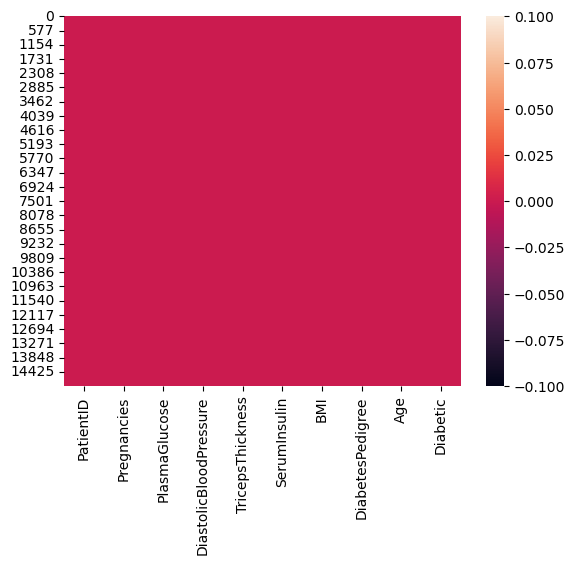

In [5]:
import seaborn as sns

sns.heatmap(df.isna())

There are no missing values, so we can proceed.  

We will drop the **PatientID** column for the rest of the analysis because it is not useful and takes up unnecessary space.  

Now, it’s time to check if there are any outliers we need to address and whether there is any imbalance in the **Diabetic** variable that we should consider.